In [430]:
# import statements for binary classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [431]:
# read the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [432]:
# drop the columns that are not needed
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)

# save passenger ids for the test data
passenger_ids_test = test_data['PassengerId']
test_data = test_data.drop(['Name', 'PassengerId'], axis=1)

In [433]:
# put transported column in y
y = train_data['Transported']
X = train_data.drop(['Transported'], axis=1)

In [434]:
# combine RoomService,FoodCourt,ShoppingMall,Spa,VRDeck into one column named MoneySpent
X['MoneySpent'] = X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['Spa'] + X['VRDeck']
X = X.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

test_data['MoneySpent'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']
test_data = test_data.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

print(X.head())


  HomePlanet CryoSleep  Cabin  Destination   Age    VIP  MoneySpent
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False         0.0
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False       736.0
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True     10383.0
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False      5176.0
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False      1091.0


In [435]:
# split the cabin column into deck, num and side columns
X[['Deck', 'Num', 'Side']] = X['Cabin'].str.split('/', expand=True)
X = X.drop(['Cabin'], axis=1)

test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)
test_data = test_data.drop(['Cabin'], axis=1)

X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,MoneySpent,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,736.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,10383.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,5176.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,1091.0,F,1,S


In [436]:
# find categorical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == 'object']

# print unique values in each categorical column
for col in categorical_cols:
    print(col, X[col].unique())

HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP [False True nan]
Deck ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Num ['0' '1' '2' ... '1892' '1893' '1894']
Side ['P' 'S' nan]


In [437]:
# print frequencies of each values in the HomePlanet, CryoSleep, Destination, VIP, Side, Deck columns
print(X['HomePlanet'].value_counts(), '\n')
print(X['CryoSleep'].value_counts(), '\n')
print(X['Destination'].value_counts(), '\n')
print(X['VIP'].value_counts(), '\n')
print(X['Side'].value_counts(), '\n')
print(X['Deck'].value_counts(), '\n')
print(X['Num'].value_counts(), '\n')


HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64 

CryoSleep
False    5439
True     3037
Name: count, dtype: int64 

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64 

VIP
False    8291
True      199
Name: count, dtype: int64 

Side
S    4288
P    4206
Name: count, dtype: int64 

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64 

Num
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64 



(array([6.923e+03, 5.200e+02, 1.890e+02, 7.000e+01, 4.100e+01, 2.200e+01,
        8.000e+00, 7.000e+00, 4.000e+00, 1.000e+00]),
 array([    0. ,  3598.7,  7197.4, 10796.1, 14394.8, 17993.5, 21592.2,
        25190.9, 28789.6, 32388.3, 35987. ]),
 <BarContainer object of 10 artists>)

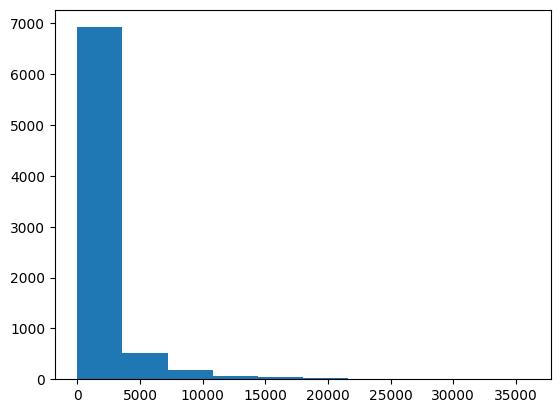

In [438]:
# distribution of the MoneySpent column
plt.hist(X['MoneySpent'])

In [439]:
# check for missing values
missing_values = X.isnull().sum()
print(missing_values)

HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
MoneySpent     908
Deck           199
Num            199
Side           199
dtype: int64


In [440]:
# fill missing values in all columns 

# fill HomePlanet with Earth since it is the most frequent value
X['HomePlanet'] = X['HomePlanet'].fillna('Earth')
test_data['HomePlanet'] = test_data['HomePlanet'].fillna('Earth')

# fill CryoSleep with 0 since it is the most frequent value
X['CryoSleep'] = X['CryoSleep'].fillna(0)
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(0)

# fill Destination with TRAPPIST-1e since it is the most frequent value
X['Destination'] = X['Destination'].fillna('TRAPPIST-1e')

# fill VIP with 0 since it is the most frequent value
X['VIP'] = X['VIP'].fillna(0)
test_data['VIP'] = test_data['VIP'].fillna(0)

# fill Age with the Median
X['Age'] = X['Age'].fillna(X['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# fill MoneySpent with the 0 since it is the most frequent value
X['MoneySpent'] = X['MoneySpent'].fillna(0)
test_data['MoneySpent'] = test_data['MoneySpent'].fillna(0)

# fill Side with 'Unknown' 
X['Side'] = X['Side'].fillna('Unknown')
test_data['Side'] = test_data['Side'].fillna('Unknown')

# fill Deck with 'Unknown'
X['Deck'] = X['Deck'].fillna('Unknown')
test_data['Deck'] = test_data['Deck'].fillna('Unknown')


# check for missing values
missing_values = X.isnull().sum()
print(missing_values)

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
MoneySpent       0
Deck             0
Num            199
Side             0
dtype: int64


In [441]:
# get dtype of each column
print(X.dtypes)

HomePlanet      object
CryoSleep       object
Destination     object
Age            float64
VIP             object
MoneySpent     float64
Deck            object
Num             object
Side            object
dtype: object


In [442]:
from sklearn.preprocessing import OrdinalEncoder

# convert cateogrical columns to string
X[categorical_cols] = X[categorical_cols].astype(str)
test_data[categorical_cols] = test_data[categorical_cols].astype(str)

# encode categorical columns using ordinal encoding
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])
test_data[categorical_cols] = encoder.fit_transform(test_data[categorical_cols])


X.head()



,HomePlanet,CryoSleep,Destination,Age,VIP,MoneySpent,Deck,Num,Side
0,1.0,1.0,2.0,39.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,2.0,24.0,1.0,736.0,5.0,0.0,1.0
2,1.0,1.0,2.0,58.0,2.0,10383.0,0.0,0.0,1.0
3,1.0,1.0,2.0,33.0,1.0,5176.0,0.0,0.0,1.0
4,0.0,1.0,2.0,16.0,1.0,1091.0,5.0,1.0,1.0


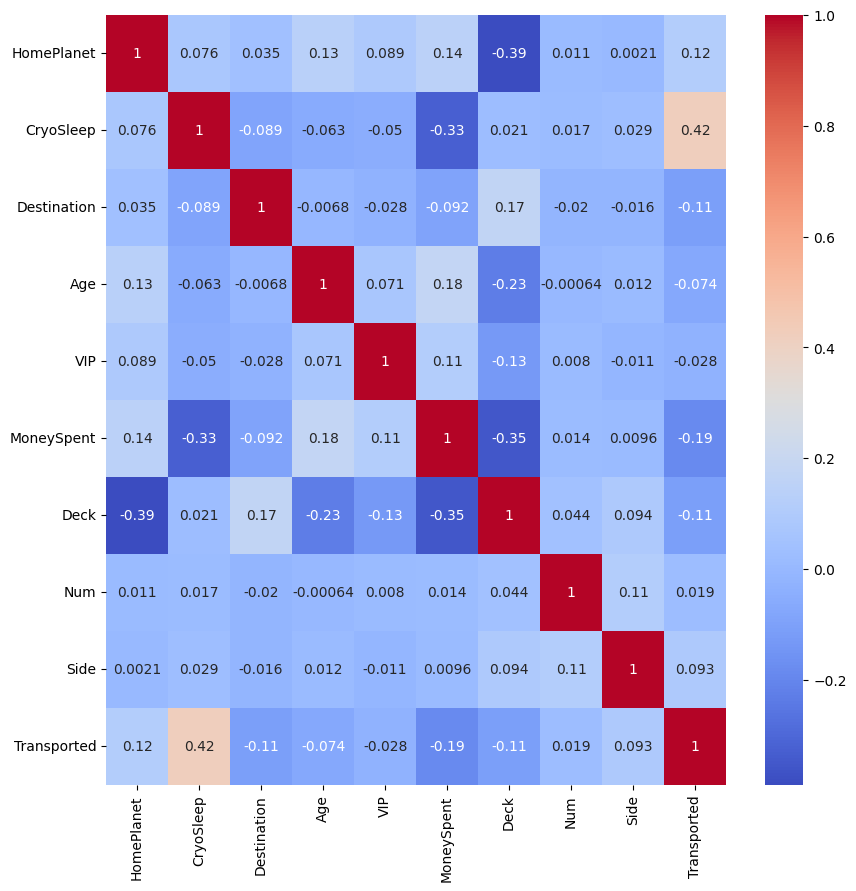

In [443]:
# plot a heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 10))
X['Transported'] = y
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()
X = X.drop(['Transported'], axis=1)

In [444]:
# remove Num column since it is correlated with Deck and Num also have many values which might not be useful
X = X.drop(['Num'], axis=1)
test_data = test_data.drop(['Num'], axis=1)


In [445]:
# scale Age, MoneySpent and Num columns
scaler = StandardScaler()
X[['Age', 'MoneySpent']] = scaler.fit_transform(X[['Age', 'MoneySpent']])
test_data[['Age', 'MoneySpent']] = scaler.fit_transform(test_data[['Age', 'MoneySpent']])

X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,MoneySpent,Deck,Side
0,1.0,1.0,2.0,0.711945,1.0,-0.486930,1.0,0.0
1,0.0,1.0,2.0,-0.334037,1.0,-0.217376,5.0,1.0
2,1.0,1.0,2.0,2.036857,2.0,3.315756,0.0,1.0
3,1.0,1.0,2.0,0.293552,1.0,1.408736,0.0,1.0
4,0.0,1.0,2.0,-0.891895,1.0,-0.087360,5.0,1.0


In [446]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Use the existing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline step for preprocessing
# preprocessing = Pipeline([
#     ('scaler', StandardScaler())
# ])

# Define your models and their parameter grids
models_and_parameters = [
    (LogisticRegression(), {'model__C': [0.1, 1, 10]}),
    (RandomForestClassifier(), {'model__n_estimators': [10, 50, 100]}),
    (GradientBoostingClassifier(), {'model__learning_rate': [0.01, 0.1, 0.5]})
]

best_models = []
best_scores = []

for model, param_grid in models_and_parameters:
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline([
        # ('preprocessing', preprocessing),
        ('model', model)
    ])
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Store the best model and its score
    best_models.append(grid_search.best_estimator_)
    best_scores.append(grid_search.best_score_)

# Find the model with the best score
best_index = best_scores.index(max(best_scores))
best_model = best_models[best_index]

print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Score: {best_scores[best_index]}")

# Optionally, evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy}")


Best Model: Pipeline(steps=[('model', GradientBoostingClassifier())])
Best Cross-Validation Score: 0.7459044525702228
Test Set Accuracy: 0.7406555491661875


In [447]:
# get the predictions with the best model
predictions = best_model.predict(test_data)

# save the predictions to a submission.csv file
output = pd.DataFrame({'PassengerId': passenger_ids_test, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
